In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
# 내 구글 드라이버에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# 필요한 패키지와 모듈을 불러옴
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_height = 150
image_width = 150
batch_size = 10

In [ ]:
# 저장해 뒀던 모델을 불러온다
new_model = load_model('gdrive/My Drive/CV/Cats vs Dogs/Cats_vs_Dogs_model.h5')

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# ImageDataGenerator를 통해 validation dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 test_generator 객체를 생성한다.
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'gdrive/My Drive/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size=10,
    class_mode='binary',
    target_size=(image_width, image_height))

# ImageDataGenerator를 통해 validation dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 pred_generator 객체를 생성한다.
pred_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'gdrive/My Drive/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size=1,
    class_mode='binary',
    target_size=(image_width, image_height))

Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
# model evaluate(모델을 평가해 봅니다)
score = new_model.evaluate(test_generator, steps=800//batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.5258831977844238
Test accuracy: 74.62499737739563


In [ ]:
# pred_generator 가 만들어낸 이미지를 우리가 만든 모델을 통해 분류 예측해 봅니다.
predictions = new_model.predict(pred_generator, steps=16, verbose=1)

16/16 [==============================] - 0s 6ms/step


In [ ]:
# predictions shape 확인
predictions.shape

(16, 1)

In [ ]:
# 예측결과 확인
predictions

array([[0.4549045 ],
       [0.9999989 ],
       [0.8233461 ],
       [0.0593156 ],
       [0.9704958 ],
       [0.5563211 ],
       [0.711211  ],
       [0.14525355],
       [0.81462103],
       [0.23356178],
       [0.1810202 ],
       [0.7964017 ],
       [0.8261613 ],
       [0.98328066],
       [0.28571302],
       [0.9751348 ]], dtype=float32)

In [ ]:
# pred_generator 가 만들어 내는 이미지의 클래스 인덱스가 무엇인지 확인해 본다.
print(pred_generator.class_indices)

{'cat': 0, 'dog': 1}


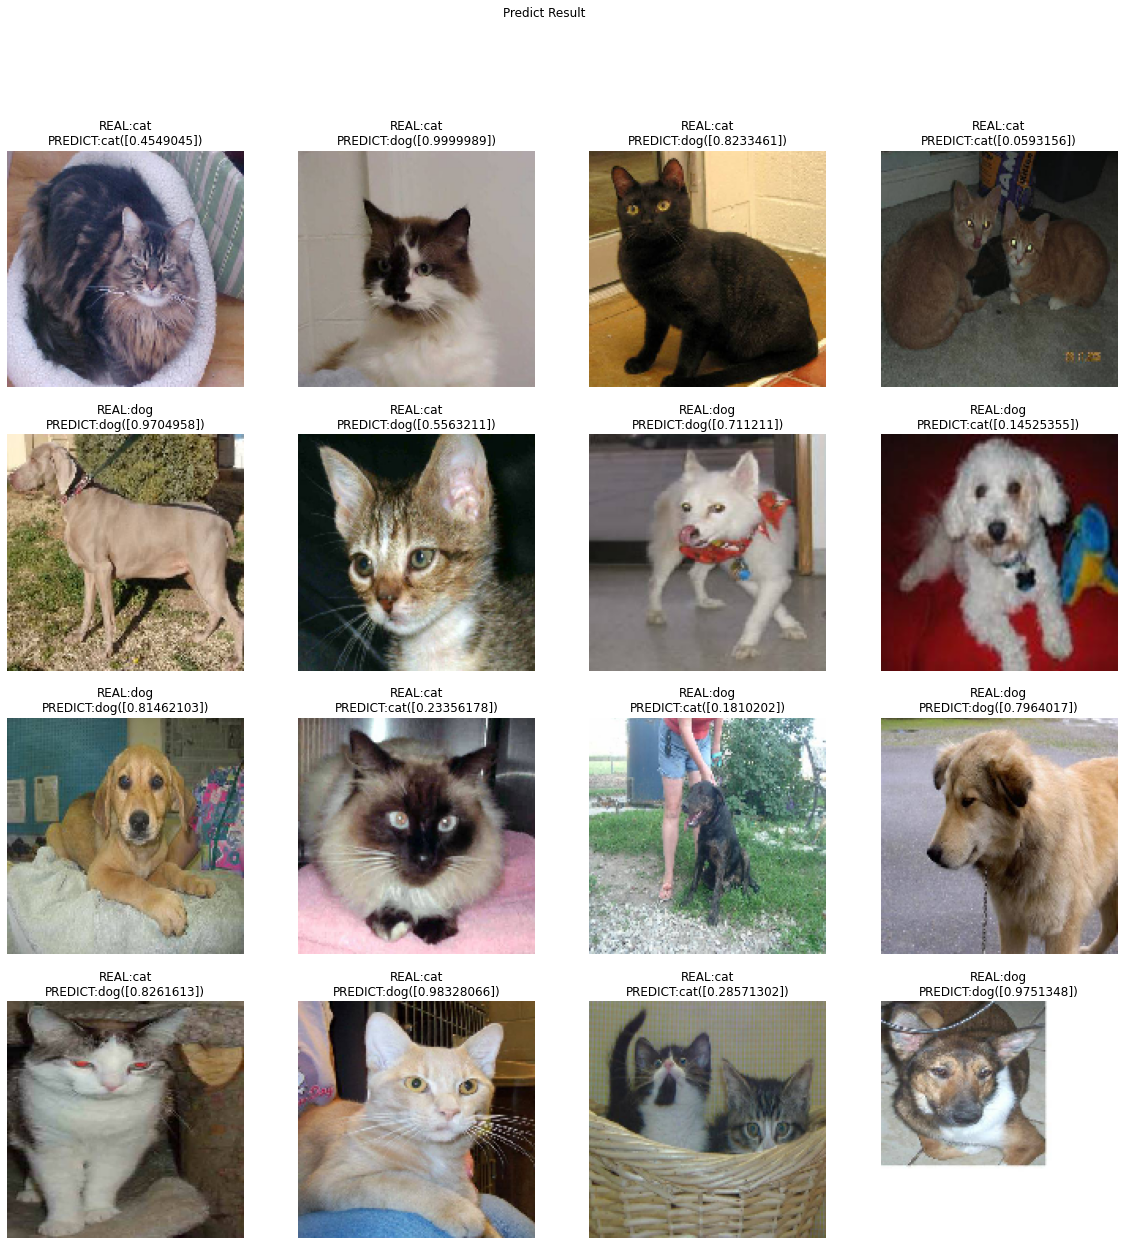

In [ ]:
# Predict Result(pred_generator 가 만들어 낸 이미지를 우리가 만든 모델을 통해 예측한 결과를 보여줍니다.)
f,ax = plt.subplots(4,4,figsize=(20,20))

for i in range(len(predictions)):
    image, label = pred_generator.next()               # pred_generator 가 만들어 낸 이미지를 하나씩 꺼내온다
    real_class = 'cat' if int(label) == 0 else 'dog'   # pred_generator 가 만들어 낸 이미지의 label name 을 가져옴
    ax[i//4,i%4].imshow(image[0])                      # pred_generator 가 만들어 낸 이미지를 보여줌
    ax[i//4,i%4].axis('off')

    pred_class = 'dog' if predictions[i] > 0.5 else 'cat' # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과 값의 label name
    pred_prob = predictions[i]                            # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과(확률값)
    ax[i//4,i%4].set_title('REAL:' + real_class + '\nPREDICT:' + pred_class + '(' + str(pred_prob) + ')')  # title 에 실제값과 모델에 의해 예측된 예측값을 함께 보여준다.

f.suptitle('Predict Result')

plt.show()